# Homework 3
For this assignment, provide your answers in this notebook. For Problem 2 (Basis Changes and Expectation Values), modify and submit the demo notebook from class. 

# 1 - Drill Questions

Recommended Reading: Wong, $\S$2.3, $\S$3.4.

1. Suppose we have a quantum state $\ket{\psi}$ equal to $\frac{1}{\sqrt{3}}\left(\ket{0} + \sqrt{2}\ket{1}\right)$.
    1. Compute the probability of measuring a $\ket{1}$ state using the projection operator $P_0$.
    2. Compute the expectation value of the state with respect to all three Pauli operators.

2. The outer product of a quantum state with itself is called the \emph{density matrix}. For each of the following states, compute the density matrix:
    1. $\ket{0}$
    3. $\ket{1}$
    4. $\frac{\left(\ket{0}| +\ket{1}\right)}{\sqrt{2}}$
    5. $\ket{\Phi^+}$
    6. $\ket{\Psi^-}$

In [50]:
# All the package declarations
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

import numpy as np

from qiskit import circuit, generate_preset_pass_manager, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.visualization import array_to_latex as mat, plot_bloch_multivector, plot_histogram
from qiskit_ibm_runtime import EstimatorV2 as Estimator, QiskitRuntimeService, SamplerV2 as Sampler

## 1.1.1

In [24]:
state = np.sqrt(2)/np.sqrt(3)
probability = pow(state, 2)
print(probability)

0.6666666666666669


## 1.1.2

In [29]:
zero_state = np.array(([1, 0]))
one_state = np.array(([0, 1]))

state = (1 / np.sqrt(3)) * (zero_state + np.sqrt(2) * one_state)

X = np.array([[0, 1],
              [1, 0]])


Y = np.array([[0+0j, 0-1j],
              [0+1j, 0+0j]])

Z = np.array([[1, 0],
              [0, -1]])

state_conj = state.conj().T

Px = state @ X @ state_conj
print (Px)

Py = state @ Y @ state_conj
print (Py)

Pz = state @ Z @ state_conj
print (Pz)

0.9428090415820636
0j
-0.3333333333333334


## 1.2.1

In [42]:
zero_state = np.array(([1, 0]))
zero_outer = np.outer(zero_state, zero_state)
mat(zero_outer)

<IPython.core.display.Latex object>

## 1.2.2

In [43]:
one_state = np.array(([0, 1]))
one_outer = np.outer(one_state, one_state)
mat(one_outer)

<IPython.core.display.Latex object>

## 1.2.3

In [144]:
hadamard_state = 1/np.sqrt(2) * (zero_state + one_state)
hadamard_outer = np.outer(hadamard_state, hadamard_state)
mat(hadamard_outer)

<IPython.core.display.Latex object>

## 1.2.4

In [45]:
phiplus_state = 1/np.sqrt(2) * (np.tensordot(zero_state, zero_state, axes=0) + np.tensordot(one_state, one_state, axes=0))
phiplus_outer = np.outer(phiplus_state, phiplus_state)
mat(phiplus_outer)

<IPython.core.display.Latex object>

## 1.2.5

In [48]:
psiminus_state = 1/np.sqrt(2) * (np.tensordot(zero_state, one_state, axes=0) - np.tensordot(one_state, zero_state, axes=0))
psiminus_outer = np.outer(psiminus_state, psiminus_state)
mat(psiminus_outer)

<IPython.core.display.Latex object>

PUT YOUR ANSWERS HERE, or upload as a separate file.

# 2 - Programming Exercise: Basis Changes and Expectation Values

Recommended Reading: Wong, $\S$3.4

For this exercise, re-run the notebook from class using the `ibm_rensselaer` backend instead of the simulator backend that we used. For each case, report the expectation value you measure from the hardware and compare it with:

1. The simulated value from class.
2. The analytical value obtained by computing the projection onto the observable matrix.

In your comparisons, compute the relative error between the hardware value, the simulated value, and the analytical value. Do the error bars of the hardware and simulated values overlap? If not, why might this be?

Modify and submit the demo notebook from class.

## Z-Basis

In [102]:
service = QiskitRuntimeService()
backend = service.backend(name='ibm_rensselaer')

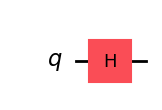

In [103]:
coin = QuantumCircuit(1)
coin.h(0)

coin.draw(output='mpl')

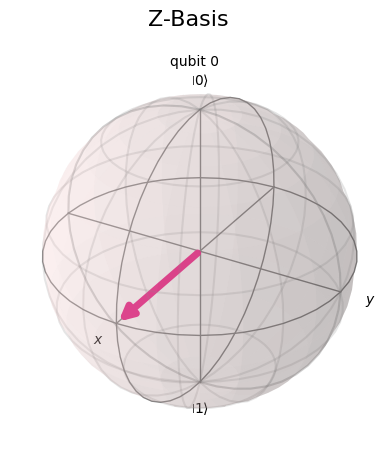

In [104]:
# Get the statevector from the circuit
state = Statevector.from_instruction(coin)

# Plot the statevector on the Bloch sphere
plot_bloch_multivector(state, title='Z-Basis')

In [105]:
coin.measure_active()

pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(coin)

In [33]:
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuit])
print(f"Job ID: {job.job_id()}")

Job ID: cw96pe9ggr6g0087rtf0


In [106]:
job_Z_basis_finished = service.job('cw96pe9ggr6g0087rtf0')
result_Z_basis = job_Z_basis_finished.result()
data_Z_basis = result_Z_basis[0].data.measure.get_counts()

#### Hardware

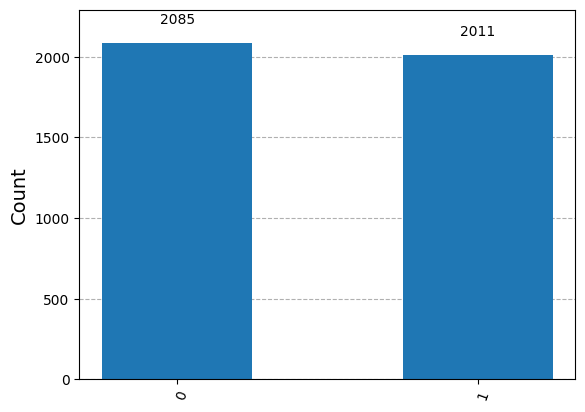

In [107]:
plot_histogram(data_Z_basis)

In [121]:
percent_Z_basis_hardware = data_Z_basis['0'] / data_Z_basis['1']

#### Simulated

In [74]:
simulator = AerSimulator()
sim_sampler = Sampler(mode=simulator)
sim_sampler.options.default_shots = 4096

sim_job_Z = sim_sampler.run([coin])

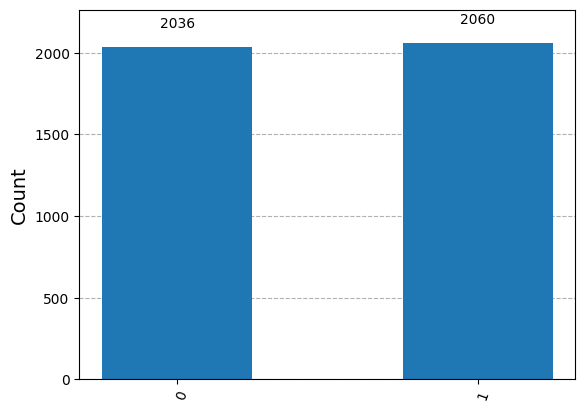

In [114]:
result_Z_basis_sim = sim_job_Z.result()
data_Z_basis_sim = result_Z_basis_sim[0].data.measure.get_counts()
plot_histogram(data_Z_basis_sim)

In [115]:
percent_Z_basis_simulated = data_Z_basis_sim['0'] / data_Z_basis_sim['1']

0.9883495145631068

#### Analytical

In [242]:
percent_Z_basis_analytical = 1

#### Error Rates

In [243]:
percent_error_Z_simulated = (percent_Z_basis_hardware - percent_Z_basis_simulated) / percent_Z_basis_simulated
percent_error_Z_analytical = (percent_Z_basis_hardware - percent_Z_basis_analytical) / percent_Z_basis_analytical
print(percent_error_Z_simulated)
print(percent_error_Z_analytical)

0.049019195993743665
0.03679761312779717


## X-Basis

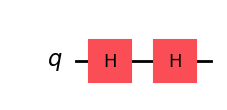

In [128]:
coin_X = QuantumCircuit(1)

coin_X.h(0)
coin_X.h(0)

coin_X.draw(output='mpl')

In [129]:
coin_X.measure_active()

isa_circuit_X = pm.run(coin_X)

In [44]:
job_X = sampler.run([isa_circuit_X])
print(f"Job ID: {job_X.job_id()}")

Job ID: cw96te9jyrs0008gymbg


In [83]:
job_X_basis_finished = service.job('cw96te9jyrs0008gymbg')
result_X_basis = job_X_basis_finished.result()
data_X_basis = result_X_basis[0].data.measure.get_counts()

#### Hardware

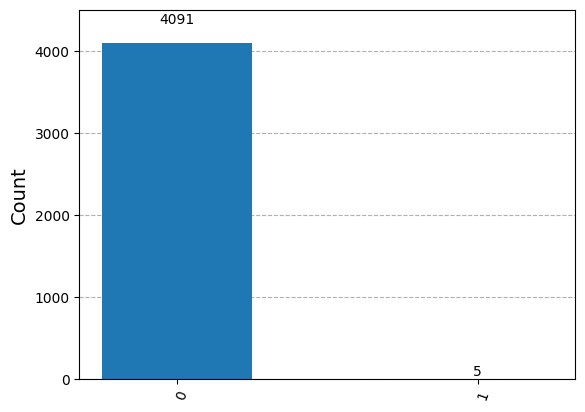

In [84]:
plot_histogram(data_X_basis)

In [130]:
percent_X_basis_hardware = data_X_basis['1'] / data_X_basis['0']

0.0012221950623319481

#### Simulated

In [167]:
sim_job_X = sim_sampler.run([coin_X])
result_X_basis_sim = sim_job_X.result()
data_X_basis_sim = result_X_basis_sim[0].data.measure.get_counts()
percent_X_basis_sim = 0

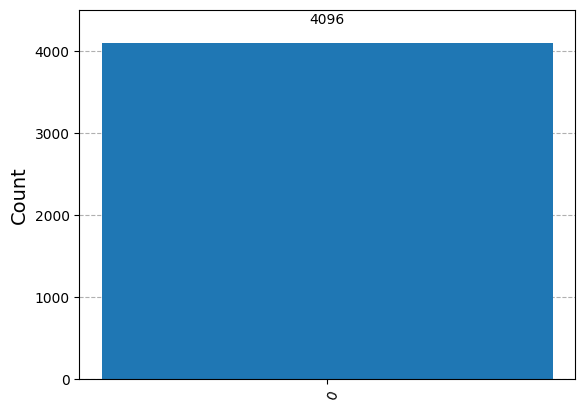

In [247]:
plot_histogram(data_X_basis_sim)

#### Analytical

In [172]:
percent_X_basis_analytical = 0

#### Error Rates

In [251]:
percent_error_X_simulated = np.float64(percent_X_basis_hardware - percent_X_basis_sim) / percent_X_basis_sim
percent_error_X_analytical = np.float64(percent_X_basis_hardware - percent_X_basis_analytical) / float(percent_X_basis_analytical
print(percent_error_X_simulated)
print(percent_error_X_analytical)

inf
inf


/var/folders/d4/z4k1h3vx4wjfx481pcdjc6fw0000gp/T/ipykernel_1128/3919594631.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  percent_error_X_simulated = np.float64(percent_X_basis_hardware - percent_X_basis_sim) / float(percent_X_basis_sim)
/var/folders/d4/z4k1h3vx4wjfx481pcdjc6fw0000gp/T/ipykernel_1128/3919594631.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  percent_error_X_analytical = np.float64(percent_X_basis_hardware - percent_X_basis_analytical) / float(percent_X_basis_analytical)


## Y-Basis

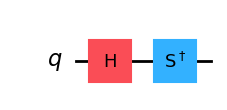

In [147]:
coin_Y = QuantumCircuit(1)

coin_Y.h(0)
coin_Y.sdg(0)

coin_Y.draw(output='mpl')

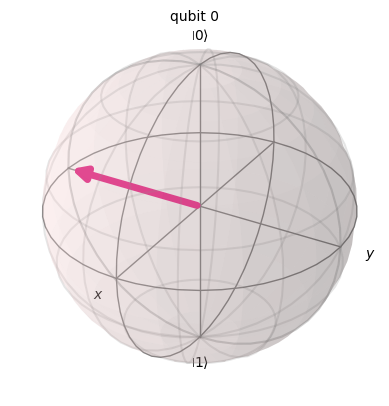

In [49]:
state_Y = Statevector(coin_Y)
plot_bloch_multivector(state_Y)

In [148]:
coin_Y.measure_active()

isa_circuit_Y = pm.run(coin_Y)

In [52]:
job_Y = sampler.run([isa_circuit_Y])
print(f"Job ID: {job_Y.job_id()}")

Job ID: cw96wbsggr6g0087rvhg


In [85]:
job_Y_basis_finished = service.job('cw96wbsggr6g0087rvhg')
result_Y_basis = job_Y_basis_finished.result()
data_Y_basis = result_Y_basis[0].data.measure.get_counts()

#### Hardware

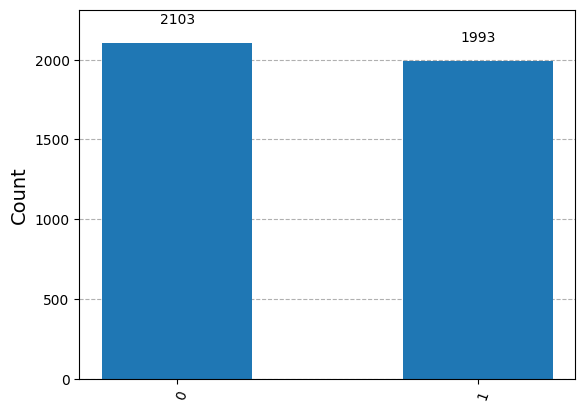

In [145]:
plot_histogram(data_Y_basis)

In [156]:
percent_Y_basis_hardware = data_Y_basis['1'] / data_Y_basis['0']

#### Simulated

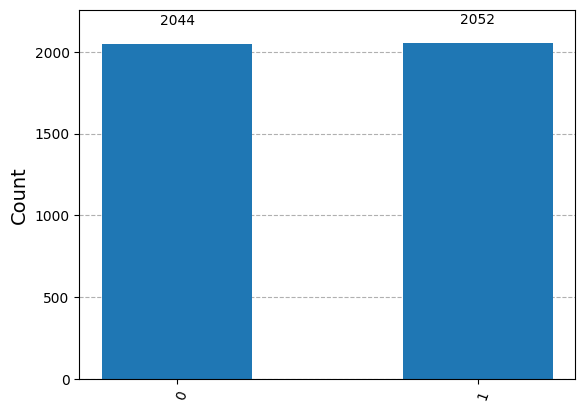

In [157]:
sim_job_Y = sim_sampler.run([coin_Y])
result_Y_basis_sim = sim_job_Y.result()
data_Y_basis_sim = result_Y_basis_sim[0].data.measure.get_counts()
percent_Y_basis_simulated = data_Y_basis_sim['1'] / data_Y_basis_sim['0']
plot_histogram(data_Y_basis_sim)

#### Analytical

In [159]:
percent_Y_basis_analytical = 1

#### Error Rates

In [175]:
percent_error_Y_simulated = (percent_Y_basis_hardware - percent_Y_basis_simulated) / percent_Y_basis_simulated
percent_error_Y_analytical = (percent_Y_basis_hardware - percent_Y_basis_analytical) / percent_Y_basis_analytical
print(percent_error_Y_simulated)
print(percent_error_Y_analytical)

-0.056000941753125505
-0.05230622919638617


## Expectation Values

In [181]:
estimator = Estimator(mode=backend)
sim_estimator = Estimator(mode=simulator)

## Z-Basis

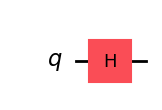

In [178]:
n_qubits = 1

coin_exp = QuantumCircuit(1)
coin_exp.h(0)

coin_exp.draw(output='mpl')

In [179]:
observable_Z = SparsePauliOp("Z" * n_qubits)
print(f">>> Observables: {observable_Z.paulis}")

>>> Observables: ['Z']


In [62]:
isa_circuit_Z = pm.run(coin_Z)
isa_layout_Z = observable_Z.apply_layout(isa_circuit_Z.layout)

In [63]:
estimator.options.default_shots = 8192

job_Z = estimator.run([(isa_circuit_Z, isa_layout_Z)])

In [189]:
job_Z_exp_finished = service.job('cw972ahggr6g0087rw70')
result_Z_exp_hardware = job_Z_exp_finished.result()
data_Z_exp_hardware = result_Z_exp_hardware[0].data.evs

#### Hardware

In [94]:
print(f"  > Expectation value: {result_Z_exp[0].data.evs}")
print(f"  > Metadata: {result_Z_exp[0].metadata}")

  > Expectation value: 0.0042037586547972305
  > Metadata: {'shots': 8192, 'target_precision': 0.011048543456039804, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32}


#### Simulated

In [231]:
job_Z_exp_sim = sim_estimator.run([(coin_exp, observable_Z)])
result_Z_sim = job_Z_exp_sim.result()
data_Z_exp_sim = result_Z_sim[0].data.evs

#### Analytical

In [230]:
state = Statevector.from_instruction(coin_exp)
H = observable_Z.to_matrix()

data_Z_exp_analytical = int(state.expectation_value(H))

/var/folders/d4/z4k1h3vx4wjfx481pcdjc6fw0000gp/T/ipykernel_1128/248568618.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  data_Z_exp_analytical = int(state.expectation_value(H))


#### Error Rates

In [246]:
percent_error_Z_simulated_exp = (data_Z_exp_hardware - data_Z_exp_sim) / data_Z_exp_sim
percent_error_Z_analytical_exp = (data_Z_exp_hardware - data_Z_exp_analytical) / data_Z_exp_analytical
print(percent_error_Z_simulated_exp)
print(percent_error_Z_analytical_exp)

-1.1132802332240097
inf


/var/folders/d4/z4k1h3vx4wjfx481pcdjc6fw0000gp/T/ipykernel_1128/3022136300.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  percent_error_Z_analytical_exp = (data_Z_exp_hardware - data_Z_exp_analytical) / data_Z_exp_analytical


## X-Basis

In [195]:
observable_X = SparsePauliOp("X" * n_qubits)
print(f">>> Observables: {observable_X.paulis}")

>>> Observables: ['X']


In [93]:
isa_layout_X = observable_X.apply_layout(layout=isa_circuit_Z.layout)

In [94]:
job_X = estimator.run([(isa_circuit_Z, isa_layout_X)])
print(f"Job ID: {job_X.job_id()}")

Job ID: cw97eb19ezk0008147hg


In [193]:
job_X_exp_finished = service.job('cw97eb19ezk0008147hg')
result_X_exp_hardware = job_X_exp_finished.result()
data_X_exp_hardware = result_X_exp_hardware[0].data.evs

#### Hardware

In [97]:
print(f"  > Expectation value: {result_X[0].data.evs}")
print(f"  > Metadata: {result_X[0].metadata}")

  > Expectation value: 0.99876968503937
  > Metadata: {'shots': 8192, 'target_precision': 0.011048543456039804, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32}


#### Simulated

In [199]:
job_X_exp_sim = sim_estimator.run([(coin_exp, observable_X)])
result_X_exp_sim = job_X_exp_sim.result()
data_X_exp_sim = int(result_X_exp_sim[0].data.evs)

#### Analytical

In [200]:
state_X = Statevector.from_instruction(coin_Z)
H = observable_X.to_matrix()

data_X_exp_analytical = int(state_X.expectation_value(H))

/var/folders/d4/z4k1h3vx4wjfx481pcdjc6fw0000gp/T/ipykernel_1128/3198693733.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  data_X_exp_analytical = int(state_X.expectation_value(H))


#### Error Rate

In [204]:
percent_error_X_simulated = (data_X_exp_hardware - data_X_exp_sim) / data_X_exp_sim
percent_error_X_analytical = (data_X_exp_hardware - data_X_exp_analytical) / data_X_exp_analytical
print(percent_error_X_simulated)
print(percent_error_X_analytical)

-0.0012303149606299746
inf


/var/folders/d4/z4k1h3vx4wjfx481pcdjc6fw0000gp/T/ipykernel_1128/361885181.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  percent_error_X_analytical = (data_X_exp_hardware - data_X_exp_analytical) / data_X_exp_analytical


## Y-Basis

In [207]:
observable_Y = SparsePauliOp("Y" * n_qubits)
print(f">>> Observables: {observable_Y.paulis}")

>>> Observables: ['Y']


In [137]:
isa_layout_Y = observable_Y.apply_layout(layout=isa_circuit_Z.layout)

In [146]:
job_Y = estimator.run([(isa_circuit_Z, isa_layout_Y)])
print(f"Job ID: {job_Y.job_id()}")

Job ID: cw9bdx7bhxtg008wrjzg


#### Hardware

In [206]:
job_Y_exp_finished = service.job('cw9bdx7bhxtg008wrjzg')
result_Y_exp_hardware = job_Y_exp_finished.result()
data_Y_exp_hardware = result_Y_exp_hardware[0].data.evs

In [99]:
print(f"  > Expectation value: {result_Y[0].data.evs}")
print(f"  > Metadata: {result_Y[0].metadata}")

  > Expectation value: -0.012339585389930898
  > Metadata: {'shots': 8192, 'target_precision': 0.011048543456039804, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32}


#### Simulated

In [213]:
job_Y_exp_sim = sim_estimator.run([(coin_exp, observable_Y)])
result_Y_exp_sim = job_Y_exp_sim.result()
data_Y_exp_sim = result_Y_exp_sim[0].data.evs
print(data_Y_exp_sim)

0.0009765625


#### Analytical

In [226]:
state_Y = Statevector.from_instruction(coin_exp)
H = observable_Y.to_matrix()

data_Y_exp_analytical = int(state_Y.expectation_value(H))

np.complex128(0j)

#### Error Rates

In [212]:
percent_error_Y_simulated_exp = (data_Y_exp_hardware - data_Y_exp_sim) / data_Y_exp_sim
percent_error_Y_analytical_exp = (data_Y_exp_hardware - data_Y_exp_analytical) / data_Y_exp_analytical
print(percent_error_Y_simulated_exp)
print(percent_error_Y_analytical_exp)

0.9439592983521907
-inf


/var/folders/d4/z4k1h3vx4wjfx481pcdjc6fw0000gp/T/ipykernel_1128/3939016099.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  percent_error_Y_analytical_exp = (data_Y_exp_hardware - data_Y_exp_analytical) / data_Y_exp_analytical


## 0 or 1 State

In [217]:
observable_bin = SparsePauliOp(["I", "Z"],
                              [0.5, -0.5])
print(f">>> Observables: {observable_bin.paulis}")

>>> Observables: ['I', 'Z']


In [151]:
isa_layout_bin = observable_bin.apply_layout(layout=isa_circuit_Z.layout)

In [152]:
job_bin = estimator.run([(isa_circuit_Z, isa_layout_bin)])
print(f"Job ID: {job_bin.job_id()}")

Job ID: cw9bef12802g0081mq7g


#### Hardware

In [216]:
job_bin_finished = service.job('cw9bef12802g0081mq7g')
result_bin_hardware = job_bin_finished.result()
data_bin_hardware = result_bin_hardware[0].data.evs

In [157]:
print(f"  > Expectation value: {data_bin}")
print(f"  > Metadata: {result_bin[0].metadata}")

  > Expectation value: 0.4986493123772102
  > Metadata: {'shots': 8192, 'target_precision': 0.011048543456039804, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32}


#### Simulated

In [218]:
job_bin_sim = sim_estimator.run([(coin_exp, observable_bin)])
result_bin_sim = job_bin_sim.result()
data_bin_sim = result_bin_sim[0].data.evs

#### Analytical

In [224]:
state_bin = Statevector.from_instruction(coin_exp)
H = observable_bin.to_matrix()

data_bin_analytical = float(state_bin.expectation_value(H))

/var/folders/d4/z4k1h3vx4wjfx481pcdjc6fw0000gp/T/ipykernel_1128/1025992798.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  data_bin_analytical = float(state_bin.expectation_value(H))


#### Error Rates

In [225]:
percent_error_bin_simulated = (data_bin_hardware - data_bin_sim) / data_bin_sim
percent_error_bin_analytical = (data_bin_hardware - data_bin_analytical) / data_bin_analytical
print(percent_error_bin_simulated)
print(percent_error_bin_analytical)

0.0017006294737876683
-0.002701375245579341


## Sweeping Parameters

In [158]:
number_of_angles = 21

angles = np.linspace(0, 2 * np.pi, number_of_angles)

individual_angles = [[angle] for angle in angles]

print(angles)

[0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265 3.45575192
 3.76991118 4.08407045 4.39822972 4.71238898 5.02654825 5.34070751
 5.65486678 5.96902604 6.28318531]


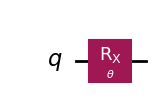

In [161]:
theta = circuit.Parameter("$\\theta$")

cirq = QuantumCircuit(1)
cirq.rx(theta, 0)

cirq.draw(output='mpl')

In [163]:
observable_parameter = SparsePauliOp("Z")
print(f">>> Observables: {observable_parameter.paulis}")

>>> Observables: ['Z']


In [172]:
isa_circuit_parameter = pm.run(cirq)
isa_layout_parameter = observable_parameter.apply_layout(isa_circuit_parameter.layout)

In [173]:
pub = [isa_circuit_parameter, [isa_layout_parameter], individual_angles]

In [174]:
job_parameter = estimator.run(pubs=[pub])
print(f"Job ID: {job_parameter.job_id()}")

Job ID: cw9bmpajzdhg008efx90


In [201]:
result_parameter = job_parameter.result()
data_parameter = result_parameter[0].data.stds
data_parameter

DataBin(evs=np.ndarray(<shape=(21,), dtype=float64>), stds=np.ndarray(<shape=(21,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(21,), dtype=float64>), shape=(21,))

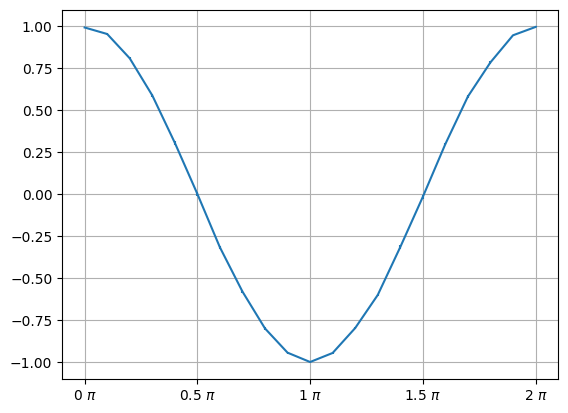

In [203]:
evs = result_parameter[0].data.evs
stds = result_parameter[0].data.stds

fig, ax = plt.subplots()

ax.errorbar(angles/np.pi, evs, yerr=stds)

# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\\pi$"))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
plt.grid()
plt.show()

## Multi-Qubits

In [177]:
phiplus = QuantumCircuit(2)
phiplus.h(0)
phiplus.cx(0, 1)

phiminus = QuantumCircuit(2)
phiminus.x(0)
phiminus.h(0)
phiminus.cx(0, 1)

In [178]:
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [180]:
isa_circuit_phiplus = pm.run(phiplus)
isa_layout_phiplus = [observable.apply_layout(isa_circuit_phiplus.layout) for observable in observables]

isa_circuit_phiminus = pm.run(phiminus)
isa_layout_phiminus = [observable.apply_layout(isa_circuit_phiminus.layout) for observable in observables]

In [181]:
job_multi = estimator.run([(isa_circuit_phiplus, isa_layout_phiplus), (isa_circuit_phiminus, isa_layout_phiminus)])
print(f"Job ID: {job_multi.job_id()}")

Job ID: cw9brz3ggr6g0087sdkg


In [198]:
result = job_multi.result()

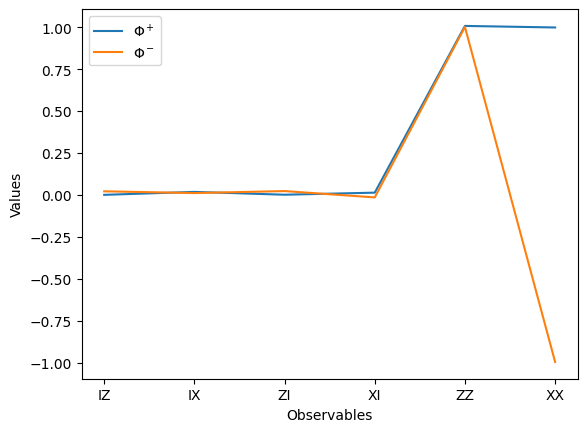

In [199]:
ev_plus = result[0].data.evs
ev_minus = result[1].data.evs
 
# plotting graph
#plt.plot(observables_labels, ev_plus, ev_minus, 'o')
plt.plot(observables_labels, ev_plus, label=r'$\Phi^+$')
plt.plot(observables_labels, ev_minus, label=r'$\Phi^-$')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.legend()
plt.show()

# 3 - Programming Exercise: Beating the House with Quantum Entanglement

Recommended Reading: 
- Wong, $\S$6.2
- IBM: https://learning.quantum.ibm.com/course/basics-of-quantum-information/entanglement-in-action

In class, we talked about the CHSH game, which shows that two players using an entangled state to coordinate decisions can gain an edge over the best classical strategy.

1. Visit the Qiskit tutorial at [this link](https://learning.quantum.ibm.com/tutorial/chsh-inequality) and watch the video (approx. 20 minutes) on the CHSH game. You can optionally read the [Entanglement in Action](https://learning.quantum.ibm.com/course/basics-of-quantum-information/entanglement-in-action#the-chsh-game) tutorial for more background information.

2. Complete the sections below marked `# YOUR CODE GOES HERE`. You can check your answers against the implementation shown in the Qiskit tutorial in step 1.

3. Answer the in-line questions below.

In [204]:
# General
import numpy as np

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [ ]:
# Setup the hardware backend
service = QiskitRuntimeService(name='rpi-quantum')
backend = service.backend('ibm_rensselaer')

### Creating a Parameterized Circuit
In the next cell, you will need to create a Bell state using a Hadamard and CX gate as we have done in previous exercises. In order to continuously vary the measurement basis, we also need to add an $R_y$ gate to the first qubit. $R_y$ represents an arbitrary rotation around the Y-axis by an angle $\theta$.

In the original CHSH example, both Alice and Bob choose a measurement basis, which would imply that both qubits ought to have a rotation gate. The reason we only need one $R_y$ gate is because that is only the *relative phase difference* between Alice and Bob's basis choices that matters. Thus, it is sufficient to apply an $R_y$ gate to only a single qubit, while holding the basis fixed for the other one.

**Task:** Create a Qiskit `Parameter` that represents the rotation angle $\theta$. Then, create the Bell circuit and $R_y$ gate, where the `Parameter` you created is passed to the $R_y$ gate.

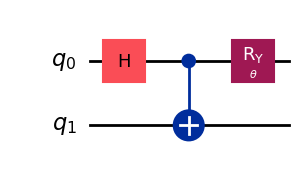

In [210]:
# 1. YOUR CODE GOES HERE - Create a Parameter to hold the angle values we'll be
# varying
theta = circuit.Parameter("$\\theta$")

chsh_circuit = QuantumCircuit(2)
chsh_circuit.h(0)
chsh_circuit.cx(0,1)

# 2. YOUR CODE GOES HERE - Add an Ry gate to the circuit that rotates qubit 0
# by the angle theta that you defined in the parameter. 
chsh_circuit.ry(theta, 0)

chsh_circuit.draw(output="mpl", idle_wires=False, style="iqp")

**Task:** In the next cell we create a Hadamard circuit, which simulates what would happen if Alice and Bob made their yes/no decisions based on unentangled quantum states. You can reuse the same `Parameter` you defined in the previous cell.

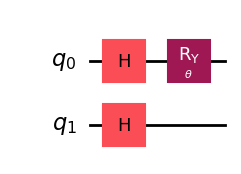

In [211]:
hadamard_circuit = QuantumCircuit(2)

# 1. YOUR CODE GOES HERE - Add a Hadamard gate to each qubit.
hadamard_circuit.h(0)
hadamard_circuit.h(1)

# 2. YOUR CODE GOES HERE - Add an Ry gate to the circuit that rotates qubit 0
# by the angle theta that you defined in the parameter. You can reuse the same
# parameter as in the previous cell 
hadamard_circuit.ry(theta, 0)

hadamard_circuit.draw(output="mpl", idle_wires=False, style="iqp")

### Creating a Grid of Parameters
Now that we have parameterized circuits, we need to create the actual parameters that will fill the placeholders we created. Running the next cell will create a grid of $\theta$ values that runs from $0$ to $2\pi$, in increments of $\frac{pi}{12}$. Then it puts the individual values into a "list of lists" format needed by Qiskit.

In [212]:
# DO NOT MODIFY - Create a grid of parameters
number_of_phases = 25
phases = np.linspace(0, 2*np.pi, number_of_phases)

# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]

### Observables for Alice and Bob
The measurement bases chosen by Alice and Bob depend on the input they see. We use $A$ and $B$ to denote their chosen bases if they see a red card, and $a$ and $b$ their choices if they see a black card. In the tutorial example, these correspond to Alice and Bob's basis choices when they see a 0, or 1, respectively.

We define a value, $S$, called the *CHSH witness*, which is given by:

$$S_1 = \langle A \otimes B\rangle - \langle A \otimes b \rangle + \langle a \otimes B\rangle + \langle a \otimes b\rangle$$
and
$$S_2 = \langle A \otimes B\rangle + \langle A \otimes b \rangle - \langle a \otimes B\rangle + \langle a \otimes b\rangle$$

The angle brackets $\langle \cdot \rangle$ denote an **expectation value**. 

**Note**: In some references (including the Qiskit tutorial), the tensor product notation $\otimes$ is implied when showing the tensor product of observables.
$$S_1 = \langle AB\rangle - \langle Ab \rangle + \langle aB\rangle + \langle ab\rangle$$
and
$$S_2 = \langle AB\rangle + \langle Ab \rangle - \langle aB\rangle + \langle ab\rangle$$

are the same as above.

In the CHSH experiment, Alice and Bob perform measurements based on their inputs, and we're interested in the average behavior over many trials. To implement this efficiently on the hardware:

1. We apply an $R_y(\theta)$ rotation to Alice's qubit. This rotation changes her measurement basis relative to Bob's. By varying $\theta$, we can see the impact on their wining probability as a function of measurement choices.
2. The sum of operator expectation values is equal to the expectation value of the sum of the operators:
$$\langle A + B \rangle = \langle A \rangle + \langle B\rangle$$
This allows us to define $S$ directly as an observable:

$$\langle\hat{S}\rangle = \langle A\otimes B \mp A\otimes b \pm a\otimes B + a\otimes b \rangle$$

Since we can only use $X$, $Y$ and $Z$ operators in `SparsePauliOp`, we have to format our observable in terms of those operators: 

- For Alice:
  - $A=Z$ (when she sees a red card)
  - $a=X$ (when she sees a black card)
- For Bob:
  - $B=Z$ (when he sees a red card)
  - $b=X$ (when he sees a black card)

This gives us a `SparsePauliOp` observable of:
$$\langle\hat{S}\rangle = \langle Z\otimes Z \mp Z\otimes X \pm X\otimes Z + X\otimes X \rangle$$

By applying $R_y(\theta)$ to Alice's qubit before measurement, we effectively change her measurement basis. The $S$ expectation value is then calculated using the measurement results of the Pauli observables, where the basis change induced by $R_y(\theta)$ is implied.

**Task:** In the cell below, fill in the correct coefficients for the `SparsePauliOp` defines for each $S$ observable. The operator components have been defined for you.

In [237]:
# YOUR CODE GOES HERE - Create the measurement observables for both S1 and S2 cases.

# <S1> = <AB> - <Ab> + <aB> + <ab> -> <ZZ> - <ZX> + <XZ> + <XX>
s1_observable = SparsePauliOp.from_list([("ZZ", 1), # PUT THE CORRECT COEFFICIENT HERE (replace the @)
                                         ("ZX", -1), # PUT THE CORRECT COEFFICIENT HERE (replace the @)
                                         ("XZ", 1), # PUT THE CORRECT COEFFICIENT HERE (replace the @)
                                         ("XX", 1)]) # PUT THE CORRECT COEFFICIENT HERE (replace the @)

# <CS2> = <AB> + <Ab> - <aB> + <ab> -> <ZZ> + <ZX> - <XZ> + <XX>
s2_observable = SparsePauliOp.from_list([("ZZ", 1), # PUT THE CORRECT COEFFICIENT HERE (replace the @)
                                         ("ZX", 1), # PUT THE CORRECT COEFFICIENT HERE (replace the @) 
                                         ("XZ", -1), # PUT THE CORRECT COEFFICIENT HERE (replace the @) 
                                         ("XX", 1)]) # PUT THE CORRECT COEFFICIENT HERE (replace the @)

### Transpilation

Now that the circuits and observables have been defined, we need to transpile the circuits and apply the observables.

**Task:** Run the cell to perform the transpilation and observable application operations. In the next blank cell below it, write a few sentences explaining what you think is happening here (what is the transpilation doing, what does it mean to apply the observable to your transpiled circuit?

PUT YOUR ANSWER HERE

In [238]:
# DO NOT MODIFY - Transpile the circuits and observables.

# Create a pass manager to transpile our circuits and observables 
pm = generate_preset_pass_manager(target=backend.target,
                                  optimization_level=3)

# Run the transpiler on the base CHSH and Hadamard circuits we created.
isa_circuits = pm.run([chsh_circuit, hadamard_circuit])

# Run the transpiler on the observables and apply them to the base circuits we
# transpiled in the previous step.
isa_s1 = [s1_observable.apply_layout(layout=circuit.layout)
             for circuit in isa_circuits]
isa_s2 = [s2_observable.apply_layout(layout=circuit.layout)
           for circuit in isa_circuits]

### Preparing the Job
Once we have the circuits transpiled and observables applied, we need to create PUBs (primitive unified blocks) that bundle up all the circuits, observables and parameters we need to do our calculation.

In [239]:
# DO NOT MODIFY - Create an Estimator and prepare the PUB objects for execution.
estimator = Estimator(mode=backend)

chsh_pub = (
    isa_circuits[0],  # ISA circuit
    [[isa_s1[0]], [isa_s2[0]]],  # ISA Observables
    individual_phases,  # Parameter values
)

hadamard_pub = (
    isa_circuits[1],  # ISA circuit
    [[isa_s1[1]], [isa_s2[1]]],  # ISA Observables
    individual_phases,  # Parameter values
)

### Running the Job
Run the cell below to submit your circuits to the machine. Since we created a grid of parameters for each case, the machine will need to run $G\cdot N$ circuits, where $G$ is the number of grid points in your parameter grid, and $N$ is the number of cases we're testing.

This job should take about 5 minutes once it gets to the front of the queue. You can use the `status` cell below to check if it is completed.

In [240]:
# DO NOT MODIFY - Submit your job to the machine and print the job id so we can get it back later.
job = estimator.run(pubs=[chsh_pub, hadamard_pub])

print(f"Job ID: {job.job_id()}")

Job ID: cwa1a382802g0081p3wg


In [217]:
# DO NOT MODIFY - Print the job status. The whole job should take ~5 minutes to
# run once it gets through the queue.
print(job.status())

RUNNING


### Retrieving the Results

Once the job is complete, we use the `result` function to get the full list of results for the set of PUBs we ran. We can get the result for individual PUBs by indexing into the list. (e.g., `job_result[0]` to get the first PUB result.)

From each PUB result, we then get the computed expectation values by accessing the `job_result.data.evs` list. Since each PUB had two cases (for $S_1$ and $S_2$), we need to access them separately.

In [241]:
# DO NOT MODIFY - Retrieve the results. This will block until the job is completed.

job_result = job.result()

s1_est = job_result[0].data.evs[0]
s2_est = job_result[0].data.evs[1]

had1_est = job_result[1].data.evs[0]
had2_est = job_result[1].data.evs[1]
print(s1_est)
print(s2_est)
print(had1_est)
print(had2_est)

[ 1.97947948  1.37487487  0.70720721 -0.08458458 -0.76076076 -1.47597598
 -2.05105105 -2.47247247 -2.76026026 -2.82182182 -2.73023023 -2.5035035
 -1.9994995  -1.40540541 -0.69319319  0.02202202  0.76276276  1.46546547
  2.03603604  2.43393393  2.75325325  2.85785786  2.73323323  2.40790791
  1.99349349]
[ 2.03853854  2.47797798  2.74024024  2.85535536  2.74274274  2.44594595
  1.96796797  1.4014014   0.67317317 -0.06606607 -0.75825826 -1.40640641
 -2.00850851 -2.47447447 -2.76426426 -2.89289289 -2.71371371 -2.42942943
 -1.98998999 -1.46296296 -0.69419419  0.01201201  0.74224224  1.46696697
  2.01351351]
[ 0.9995015   0.62013958  0.32502493 -0.04087737 -0.37387836 -0.73629113
 -1.05084746 -1.27866401 -1.39780658 -1.37437687 -1.35044865 -1.25074776
 -0.96560319 -0.61914257 -0.33649053  0.0329013   0.37886341  0.7113659
  1.05932203  1.25074776  1.37387836  1.37986042  1.40628116  1.20787637
  0.99002991]
[ 1.0333998   1.27018943  1.3439681   1.40877368  1.40279163  1.15403789
  1.0279162

# Plotting the Results
Finally, we can plot the results of our CHSH $S$-values and the corresponding $S$-values for the unentangled Hadamard strategy as a function of the parameter $\theta$.

The gray band in the plot denotes the region where Bell's inequality is violated. Any $S$-values in this region signify that quantum entanglement gave the players an advantage over a strictly classical strategy.

**Task:** Run the cell below to plot the results. Answer the questions in the cells that follow. 

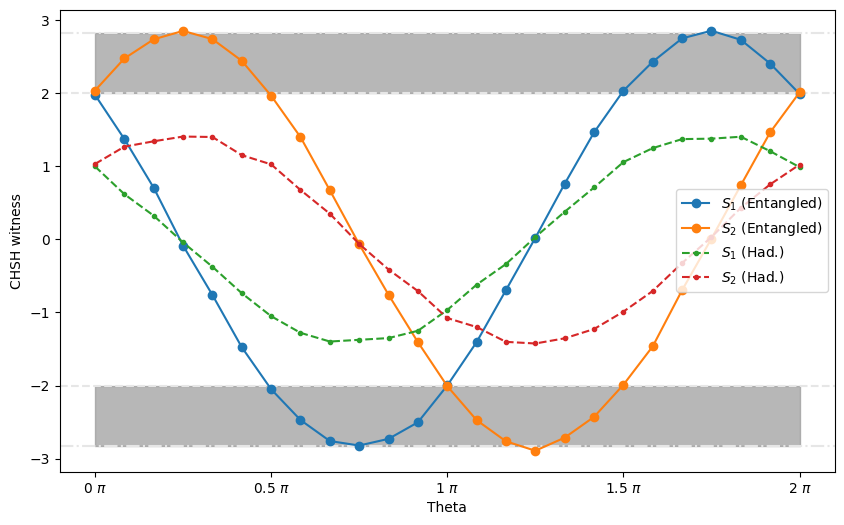

In [242]:
# DO NOT MODIFY - Plot the Results

fig, ax = plt.subplots(figsize=(10, 6))

# results from hardware
ax.plot(phases / np.pi, s1_est, "o-", label="$S_1$ (Entangled)", zorder=3)
ax.plot(phases / np.pi, s2_est, "o-", label="$S_2$ (Entangled)", zorder=3)
ax.plot(phases / np.pi, had1_est, ".--", label="$S_1$ (Had.)", zorder=3)
ax.plot(phases / np.pi, had2_est, ".--", label="$S_2$ (Had.)", zorder=3)

# classical bound +-2
ax.axhline(y=2, color="0.9", linestyle="--")
ax.axhline(y=-2, color="0.9", linestyle="--")

# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.axhline(y=-np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.fill_between(phases / np.pi, 2, 2 * np.sqrt(2), color="0.6", alpha=0.7)
ax.fill_between(phases / np.pi, -2, -2 * np.sqrt(2), color="0.6", alpha=0.7)

# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\\pi$"))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))

# set labels, and legend
plt.xlabel("Theta")
plt.ylabel("CHSH witness")
plt.legend()
plt.show()

### Questions:
1. What is the general shape of the plots you see? Does this make sense to you? Why or why not?
2. For the entangled case, does the plot enter the gray banded region, indicating a quantum advantage? If so, at what range of angles does this advantage occur?
3. Repeat question 2, but for the unentangled case.
4. At what angle does the maximum advantage occur? Is this the same for both entangled and unentangled cases?
5. We can compute the winning probability using the equation $P_{win} = \frac{1}{2} + \frac{S}{8}$. Run the cell below to get the winning probability for each case. What is $P_{win}$ for both the entangled and unentangled cases? Do these beat the best classical strategy of 75%?

## 3.3.1

The general shape is that of a sinusoidal wave, which makes sense because the result of the Ry gate is a function of sine and cosine functions.

## 3.3.2

The enangled plot does enter the grey-banded region, and from 0π to 2π either $S_1$ or $S_2$ were in the advantage zone. From 0.5π to 1π and from 1.5π to 2π for $S_1$ and from 0π to 0.5π and from 1π to 1.5π for $S_2$.

## 3.3.3

The unentangled plots never enter the advantange zone.

## 3.3.4

At 0.25π, 0.75π, 1.25π, and 1.75π is where maximum advantage occurs. This is true for both the entangled and unentangled cases. 

## 3.3.5

In [220]:
# DO NOT MODIFY - Compute the winning probabilities for each case
def p_win(S):
    return 0.5 + S/8

print(f"P_win (Entangled S_1) = {max(p_win(s1_est))}")
print(f"P_win (Entangled S_2) = {max(p_win(s2_est))}")
print(f"P_win (non-entangled  S_1) = {max(p_win(had1_est))}")
print(f"P_win (non-entangled S_2) = {max(p_win(had1_est))}")

P_win (Entangled S_1) = 0.9998756218905472
P_win (Entangled S_2) = 0.9998756218905472
P_win (non-entangled  S_1) = 0.8759970089730807
P_win (non-entangled S_2) = 0.8759970089730807


Both cases are higher than the 75% success of the classic strategy.

# 4 - Free Response: Career Exploration (15 pts)
Answer **one** of the following options in 1-2 paragraphs. There are no right or wrong answers but try to research your answers to give a thoughtful response. You can use any of the references listed below, as well as any other resources you find online.


1. Find a quantum company or government lab that interests you and navigate to their job postings page. If there is a posting that you find interesting, explain what the job requirements are and what you think you would need to do to be a qualified candidate for that position.
2. Find a university (RPI included) that conducts quantum research, and find a specific research project or experiment that you find interesting. Describe how you would either extend that research project, or propose a new one of your own.
3. Describe a business idea for a new quantum technology company. What market or customers would you serve? What would your product be? (I won't steal your ideas, I promise!)

PUT YOUR ANSWER HERE

## 4.1

https://careers.ibm.com/job/21096112/quantum-software-developer-intern-2025-remote/

This is a job posting for a software develop at IBM quantum. The requirements for this job includes, experience in cloud, systems, or scientific programming languages (a list includes Python, C++, Typescript, and Javascript), proficiency in Git or Github, currently enrolled in a university, and pursuing a bachelor's degree. Some other preferred attributes include proficiency with Qiskit, passion for coding demonstrated by Github projects, curiosity for exploring new technologies, and certifications related to Qiskit. 

So far, I fit all of the requirements. I am familiar with all the scientific programming languages I have listed, I am proficient with Github after using it in a professional setting, and I am enrolled in a university and pursing a bachelor's degree. However, I lack some of the preferred attributes. I haven't been able to contribute to any open source projects this year due to my schedule, and most of my personal projects were from last year when I was doing RCOS. I do have certifications related to Qiskit.